# Simulation Design 1

In [790]:
library(hdm)

set.seed(1)
B= 50 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

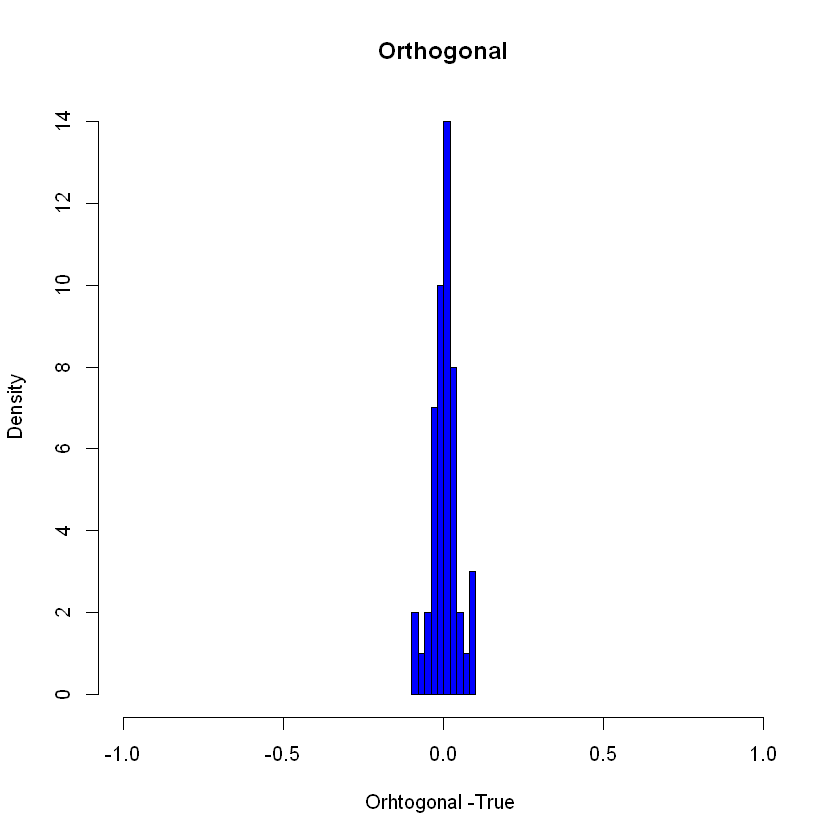

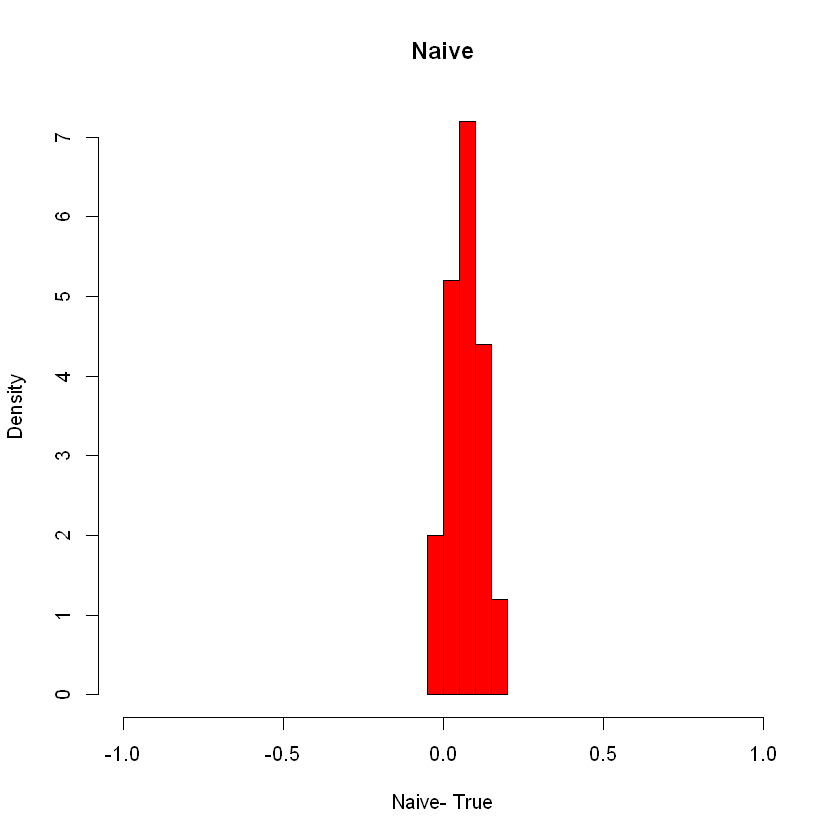

In [791]:
hist(Orthogonal-5,col=4, freq=F, xlim= c(-1,1), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2, freq=F, xlim= c(-1,1), xlab= "Naive- True", main = "Naive")


In [786]:
library(hdm)

set.seed(1)
B= 100 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


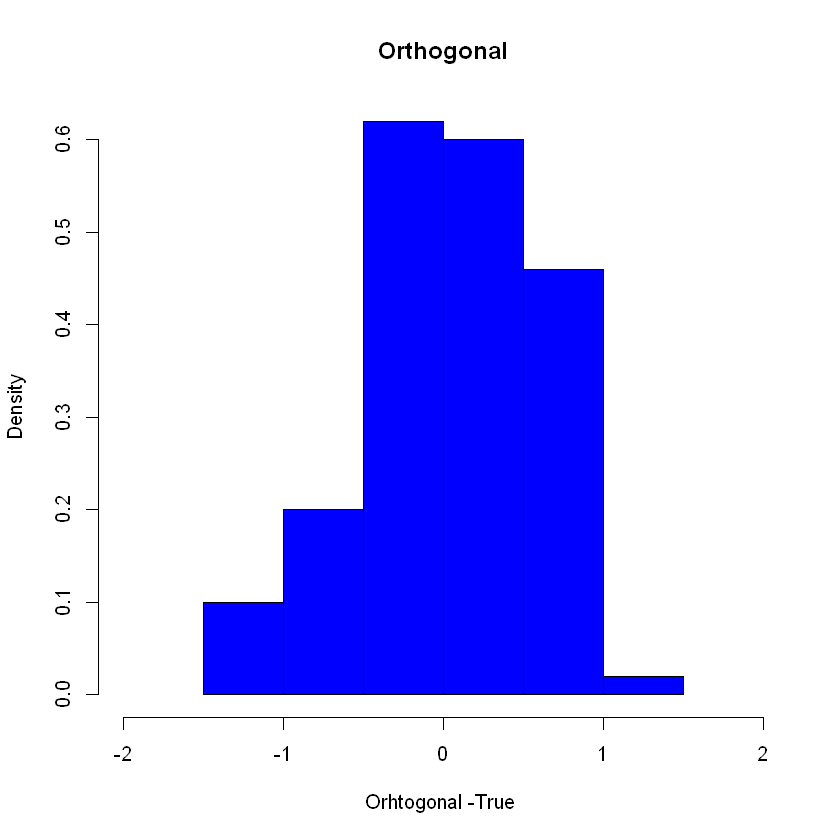

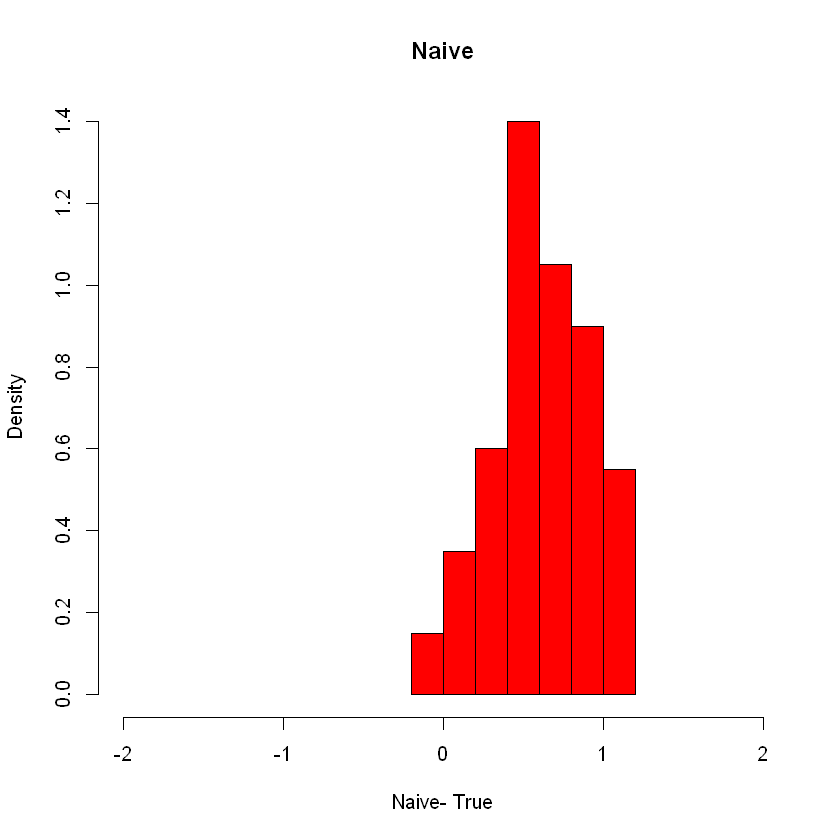

In [787]:
hist(Orthogonal-5,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


# B=1000

In [788]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

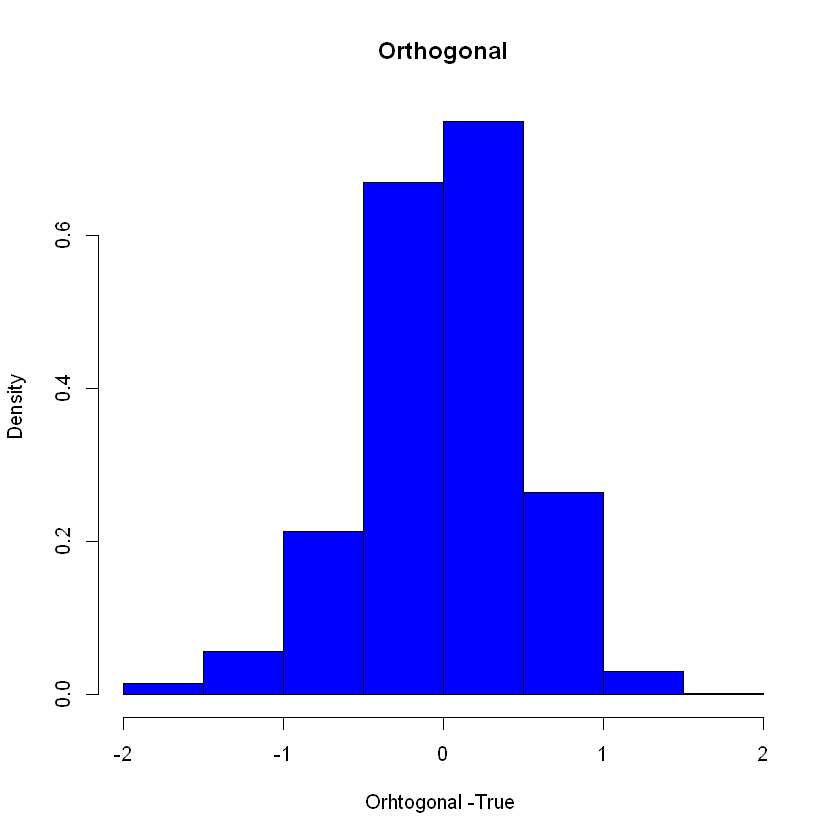

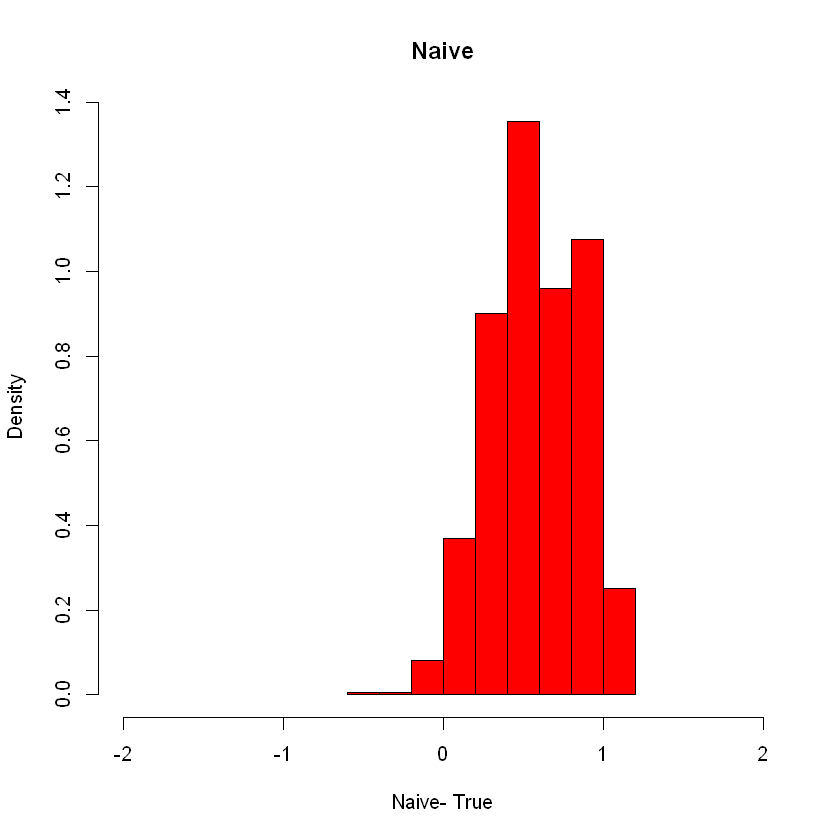

In [789]:
hist(Orthogonal-5,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")

### Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?

As we can see on the grahics, the ortogonal distribution is centered on 0, as a normal distribution. In the case of the naive histogram, is not centered exactly on 0, because the distributions of the coeficients is not as a normal.  


### Why dos this happen? 

Why dos this happen? We a simple explanation is that first, the X variable on a regression is not correlated with the error. So, if we have a histogram with a distribution different no a normal distribution, it means that the regression has a bias problem and the distribution of the coefficients is not as a normal, that brings problems at the time to measure effects.

# Double Lasso

It's a method that is used to infer the predictive effect of a specific covariable using Lasso twice in a Partialling-Out process. This is useful when having a high-dimensional regression, that is when p/n is not small where p is the number of regressor or covariates and n the number of observtations.

Having the objetive equation, in which $Y$ is the outcome, $D$ is our variable of interest and $W$ is a set of covariates:

  $$
  Y = \alpha D +  \beta_2'W + \epsilon.
  $$

We apply in Partialling-out approach the Lasso method when estimating the residuals of the first part. That is, we regress $Y$ and $W$, as well as $D$ and $W$ using Lasso and obtained the following estimators:

$$ \hat{\gamma_{YW}} = arg min  \sum_{i} (Y_i - \gamma' W_i)^2 + \lambda_1 \sum_{j} \hat{\Psi_j} | \gamma_j | $$

$$ \hat{\gamma_{DW}} = arg min  \sum_{i} (D_i - \gamma' W_i)^2 + \lambda_2 \sum_{j} \hat{\Psi_j} | \gamma_j | $$


With this, we estimte the residuals:

$$ \tilde{Y_i} = Y_i - \hat{\gamma'_{YW}} W_i  $$

$$ \tilde{D_i} = D_i - \hat{\gamma'_{DW}} W_i  $$

And finally, we use OLS to obtain $\alpha$, the coefficient of our variable of interest $D$:

$$ \hat{\alpha} = arg min  E_{n} (\tilde{Y_i} - a \tilde{D_i})^2 = (E_n \tilde{D_i}' \tilde{D_i}) ^{-1} E_n ( \tilde{D_i}' \tilde{Y_i})   $$

This method takes advantage of both the Partialling-out process, and the Lasso regression, both having valuable characteristics when dealing with high-dimensional regressions. 

# Testing the Convergence Hypothesis

## Introduction

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.


The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Data analysis


We consider the data set GrowthData which is included in the package *hdm*. First, let us load the data set to get familiar with the data.

In [378]:
library(hdm)
library(xtable)

In [379]:
# Export data to read in python
GrowthData <- GrowthData
save(GrowthData, file = "../GrowthData.RData")

In [380]:
head(GrowthData)

Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,...,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
-0.02433575,1,6.591674,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29,...,0.04,0.033,0.057,0.010,47.6,17.3,0.0729,0.0667,0.348,-0.014727
0.10047257,1,6.829794,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91,...,0.64,0.173,0.274,0.067,57.1,18.0,0.0940,0.1438,0.525,0.005750
0.06705148,1,8.895082,0.0000,0.204244,0.009186,0.260,0.325,0.201,1.00,...,18.14,2.573,2.478,2.667,26.5,20.7,0.1741,0.1750,1.082,-0.010040
0.06408917,1,7.565275,0.1997,0.248714,0.036270,0.061,0.070,0.051,1.00,...,2.63,0.438,0.453,0.424,27.8,22.7,0.1265,0.1496,6.625,-0.002195
0.02792955,1,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,...,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
0.04640744,1,7.218910,0.0000,0.258865,0.020880,0.023,0.038,0.006,0.50,...,1.46,0.160,0.174,0.146,34.3,8.1,0.0634,0.0762,1.000,-0.001747


In [381]:
library(hdm)
growth <- GrowthData
attach(growth)
names(growth)

The following objects are masked from growth (pos = 6):

    bmp1l, ex1, fert1, fert65, freeop, freetar, gde1, gdpsh465,
    geerec1, geetot1, govsh41, govwb1, gpop1, gvxdxe41, h65, hf65,
    high65, highc65, highcf65, highcm65, highf65, highm65, hm65,
    human65, humanf65, humanm65, hyr65, hyrf65, hyrm65, im1, intercept,
    invsh41, lifee065, mort1, mort65, no65, nof65, nom65, Outcome, p65,
    pf65, pinstab1, pm65, pop1565, pop65, pop6565, s65, sec65, secc65,
    seccf65, seccm65, secf65, secm65, sf65, sm65, syr65, syrf65,
    syrm65, teapri65, teasec65, tot1, worker65, xr65

The following objects are masked from growth (pos = 7):

    bmp1l, ex1, fert1, fert65, freeop, freetar, gde1, gdpsh465,
    geerec1, geetot1, govsh41, govwb1, gpop1, gvxdxe41, h65, hf65,
    high65, highc65, highcf65, highcm65, highf65, highm65, hm65,
    human65, humanf65, humanm65, hyr65, hyrf65, hyrm65, im1, intercept,
    invsh41, lifee065, mort1, mort65, no65, nof65, nom65, Outcome, p65,
    pf65, pinsta

[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

We determine the dimension of our data set.

In [382]:
dim(growth)

[1] 90 63

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

## OLS

In [383]:
reg.ols <- lm(Outcome~.-1,data=growth)

We determine the regression coefficient $\beta_1$ of the target regressor *gdpsh465* ($D$), its 95% confidence interval and the standard error.

In [384]:
est_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

ci_ols <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [385]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab<- xtable(table, digits = 3)
print(tab,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 13:19:35 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>


<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

Least squares provides a rather noisy estimate (high standard error) of the
speed of convergence, and does not allow us to answer the question
about the convergence hypothesis since the confidence interval includes zero.

In contrast, we can use the partialling-out approach based on lasso regression ("Double Lasso").

## Double LASSO using cross Validation

In [661]:
set.seed(1234)
training <- sample(nrow(growth), nrow(growth)*(3/4), replace=FALSE)

data_train <- growth[training,]
data_test <- growth[-training,]

In [662]:
head(data_train)

,Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,...,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
28,0.09210628,1,6.725034,0.0266,0.179933,0.046376,0.015,0.020,0.010,0.78,...,0.86,0.258,0.382,0.137,34.6,16.5,0.0558,0.0613,20.800,-0.018514
80,0.06522856,1,7.175490,0.0000,0.179933,0.046376,0.035,0.040,0.027,0.83,...,1.23,0.332,0.451,0.219,27.9,27.2,0.0636,0.0721,20.379,0.018019
22,0.13398221,1,8.128880,0.0000,0.167210,0.003311,0.129,0.196,0.063,1.00,...,13.16,1.727,1.910,1.560,28.1,23.2,0.0570,0.0609,360.000,-0.054874
9,0.03355124,1,9.063463,0.0000,0.109614,0.002171,0.402,0.488,0.314,1.00,...,24.72,3.206,3.154,3.253,28.2,20.6,0.0594,0.0460,1.000,0.008169
5,0.02792955,1,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,...,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
38,0.09485109,1,8.144969,0.0000,0.235179,0.009676,0.056,0.088,0.025,1.00,...,1.43,0.439,0.598,0.299,33.7,22.5,0.0480,0.0492,59.997,0.009702


In [663]:
dim(data_train)

[1] 67 63

In [664]:
dim(data_test)

[1] 23 63

In [665]:
X_basic <-  "gdpsh465+bmp1l+freeop+freetar+h65+hm65+hf65+p65+pm65+pf65+s65+sm65+sf65+fert65+mort65+lifee065+gpop1+fert1+mort1+invsh41+geetot1+geerec1+gde1+govwb1+govsh41+gvxdxe41+high65+highm65+highf65+highc65+highcm65+highcf65+human65+humanm65+humanf65+hyr65+hyrm65+hyrf65+no65+nom65+nof65+pinstab1+pop65+worker65+pop1565+pop6565+sec65+secm65+secf65+secc65+seccm65+seccf65+syr65+syrm65+syrf65+teapri65+teasec65+ex1+im1+xr65+tot1"
formula_basic <- as.formula(paste("Outcome", "~", X_basic))

model_X_basic_train <- model.matrix(formula_basic,data_train)
model_X_basic_test <- model.matrix(formula_basic,data_test)

p_basic <- dim(model_X_basic_train)[2]

In [666]:
p_basic

[1] 62

In [667]:
Y_train <- data_train$Outcome
Y_test <- data_test$Outcome

In [678]:
library(glmnet)
fit.lasso.cv   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=1)

yhat.lasso.cv    <- predict(fit.lasso.cv, newx = model_X_basic_test, s = "lambda.min")

MSE.lasso.cv <- summary(lm((Y_test-yhat.lasso.cv)^2~1))$coef[1:2]

R2.lasso.cv <- 1-MSE.lasso.cv[1]/var(Y_test)

# R^2 using cross-validation (basic model) 
cat("R^2 using cross-validation for lasso:",R2.lasso.cv)

R^2 using cross-validation for lasso: 0.04336744

In [746]:
coef_gdpsh465 <- predict(fit.lasso.cv, newx = model_X_basic_test, type="coef", s = "lambda.min")[3]

In [753]:
coef_gdpsh465

[1] -0.003181242

In [778]:
satandar_error = Y_test - yhat.lasso.cv
satandar_error = satandar_error[3]
satandar_error

[1] 0.02845287

In [769]:
lower_ci = coef_gdpsh465 - 1.96*standar_error
upper_ci = coef_gdpsh465 + 1.96*standar_error

## Double Lasso using theoretical Lambda

In [698]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)

[1] 90 60

In [699]:
r.Y <- rlasso(x=W,y=Y)$res # creates the "residual" output variable
r.D <- rlasso(x=W,y=D)$res # creates the "residual" target regressor
partial.lasso <- lm(r.Y ~ r.D)
est_lasso_theo <- partial.lasso$coef[2]
std_lasso_theo <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]

In [700]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso_theo,std_lasso_theo,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso")
tab<- xtable(table, digits = 3)
print(tab,type="html") # set type="latex" for printing table in LaTeX


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 16:42:04 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 16:42:04 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>

Lasso provides a more precise estimate (lower standard error). The Lasso based
point estimate is  about $5\%$ and the $95\%$ confidence interval for the
(annual) rate of convergence is $7.8\%$ to $2.2\%$.

## Partialling - out aproach based on lasso regrerssion (Double Lasso)

In [701]:
lasso.effect = rlassoEffect(x = W, y = Y, d = D, method = "partialling out")
lasso.effect


Call:
rlassoEffect(x = W, y = Y, d = D, method = "partialling out")

Coefficients:
[1]  -0.04981


In [702]:
est_lasso <- summary(lasso.effect)$coef[1]
std_lasso <- summary(lasso.effect)$coef[2]
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso
lower_ci_lasso

[1] -0.07712673

In [703]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,lower_ci_lasso,upper_ci_lasso)
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso")
tab<- xtable(table, digits = 3)
print(tab,type="html") # set type="latex" for printing table in LaTeX


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 16:42:50 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.077 </td> <td align="right"> -0.022 </td> </tr>
   </table>


<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Fri Oct 08 11:49:26 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> Double Lasso </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.077 </td> <td align="right"> -0.022 </td> </tr>
   </table>

Lasso provides a more precise estimate (lower standard error). The Lasso based
point estimate is  about $5\%$ and the $95\%$ confidence interval for the
(annual) rate of convergence is $7.7\%$ to $2.2\%$.

## Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure.


In [734]:
coef.vect.o <- c(as.double(est_ols), as.double(coef_gdpsh465), as.double(est_lasso_theo), as.double(est_lasso))
coef.vect.o

[1] -0.009377989 -0.003181242 -0.049811465 -0.049811465

In [785]:
sd.vect.o <- c(as.double(std_ols), as.double(1), as.double(std_lasso_theo), as.double(std_lasso))
sd.vect.o

[1] 0.02988773 1.00000000 0.01393636 0.01393636

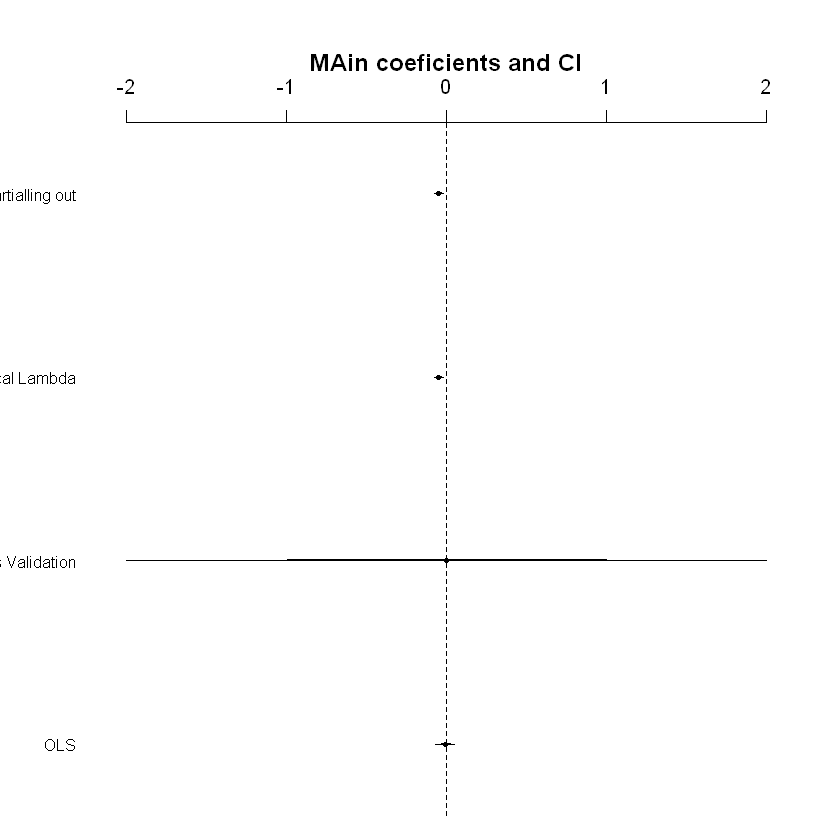

In [736]:
library(arm)
longnames <- c("OLS", "Cross Validation","Theprical Lambda", "Partialling out")
coefplot(coef.vect.o, sd.vect.o, varnames=longnames, main="MAin coeficients and CI")